# Descriptive statistics example

### Your goal:
Suppose you are asked tio exploit a stress test for a material piece.
You collect values of applied force at which the piece brokes.
You are aksed to make a statistical report of such data.

Here a (very) basic example of preliminary descriptive statistics.

In [83]:
%config IPCompleter.use_jedi=False

In [160]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats

In [161]:
# number of stress cycles before ropture
cycles = np.array(np.random.randn(100)+107)

df = pd.DataFrame(cycles, columns=['Failure cycles'])

In [162]:
datapoints = len(cycles)
print('The set has', datapoints, 'data points.')

# using numpy
mean = cycles.mean()
print('The mean number of cycles until rupture is', int(mean))

# using pandas
# print('The mean number of cycles until rupture is', round(df['k cycles'].mean(), 2))

median = np.median(cycles)
print('The median is ', median)


std = cycles.std()
var = cycles.var()
quantities = [std, var]
round_funct = lambda x: round(x,2)
std, var = list(map(round_funct, quantities))
print('The set has SD =', std, 'and Var =', var)

The set has 100 data points.
The mean number of cycles until rupture is 107
The median is  106.95782204384759
The set has SD = 1.01 and Var = 1.03


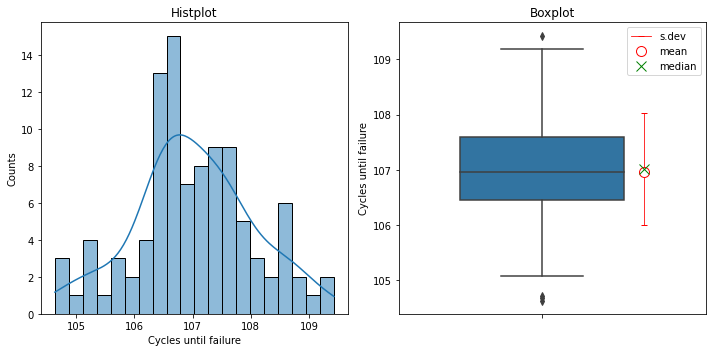

In [163]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

# plot histogram of the distribution
g = sns.histplot(df, x='Failure cycles', bins=20, kde=True, ax=ax1)
g.set(xlabel ="Cycles until failure", ylabel = "Counts", title ='Histplot')

h = sns.boxplot(y='Failure cycles', data=df)
h.set( ylabel = 'Cycles until failure', title ='Boxplot')
plt.plot([0.5,0.5], [mean-std, mean+std],'-', lw=0.8, c='r', 
         marker='_', label='s.dev')
plt.plot(0.5, median, 'or',mfc='w', ms=10, label='mean')
plt.plot(0.5, mean, 'xg',ms=10, label='median')
plt.xlim([-0.7,0.8])
plt.legend()
plt.tight_layout()